# Titanic Machine Learning from Disaster


# Goal for this Notebook:


The point of this project is to predict if an individual will survive based on the features in the data like:

- Traveling Class (called pclass in the data)
- Sex
- Age
- Fare Price

The Goal of this notebook is to demonstrate a fast and a simple explanatory  and machine learning analysis, in the form of pipelines, for the acquisition of introductory insights before continueing to a more advanced analysis.

# This Notebook will show basic examples of:

# Data Handling
 - Importing Data with Pandas
 - Cleaning Data
 - Exploring Data through Visualizations with Matplotlib

# Data Analysis
 - Automated fast track EDA/ visualisation
 - Pipelined data preperation
 - Automated Machine Learning and Neural Network analysis



In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import re


C:\Users\user\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


The following lines import custom functions from the EDA_ML_Package folder

In [2]:
sys.path.append("..")

sys.path.insert(0, '/Github/EDA_ML_Package')
from EDA_ML_Package.NN_functions import ANN_tabular_class
from EDA_ML_Package.PDF_report import PDF_reporting
from EDA_ML_Package.EDA_functions import Data_Analysis
from EDA_ML_Package.ML_functions import ML_models


In [3]:
# ------------------- Importing Data and classes ------------------------------

ML = ML_models()
ΝΝ = ANN_tabular_class()
DA = Data_Analysis()

# Some of the EDA functions are copy pasted directly from the Data_Analysis Class in the EDA_ML_Package.EDA_functions.py file

data = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
data.drop(['PassengerId'], axis=1, inplace=True)



--------------------------------------------------------------


Overview of the data:

In [4]:
print(data.head(20))

    Survived  Pclass                                               Name  \
0          0       3                            Braund, Mr. Owen Harris   
1          1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          1       3                             Heikkinen, Miss. Laina   
3          1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          0       3                           Allen, Mr. William Henry   
5          0       3                                   Moran, Mr. James   
6          0       1                            McCarthy, Mr. Timothy J   
7          0       3                     Palsson, Master. Gosta Leonard   
8          1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9          1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10         1       3                    Sandstrom, Miss. Marguerite Rut   
11         1       1                           Bonnell, Miss. Elizabeth   
12         0       3     

The first step for the EDA is to examine the amount of empty lines

The empty lines will not be addressed direclty but will be filled in a pipeline.

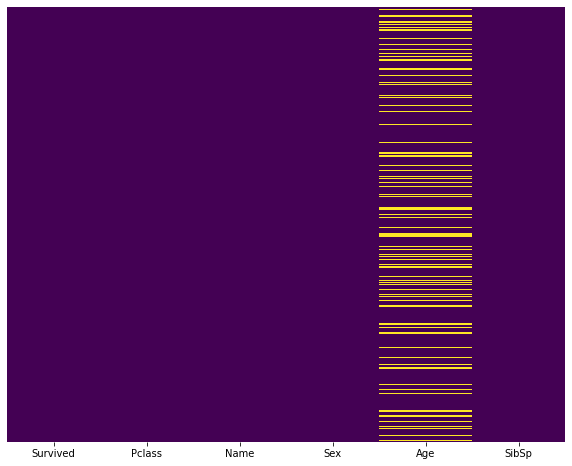

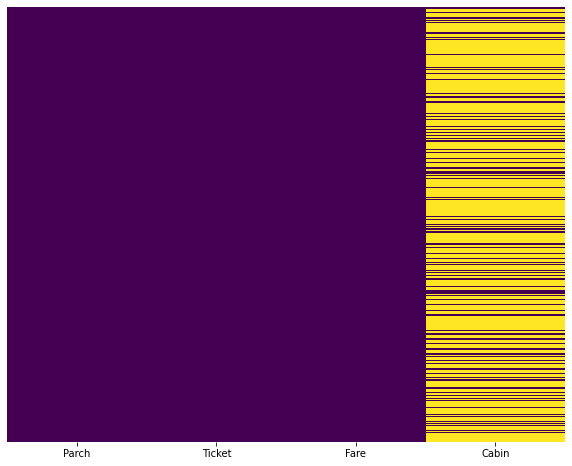

In [5]:
def nan_heatmap(data):
    """ Creates a plot that highlisghts as yellow lines the nan rows

    Parameters
    ----------
    data: (dataframe)

    Output:
    """
    fig, axes = plt.subplots(figsize=(10, 8))
    clmns = data.columns.tolist()
    if len(clmns) > 10:
        clmns1 = clmns[0:round(len(clmns)/2)]
        nht1 = sns.heatmap(data[clmns1].isnull(), cmap="viridis", yticklabels=False, cbar=False)
        plt.show()
        nht1.set_xticklabels(nht1.get_xmajorticklabels(), fontsize=18)
        figure = nht1.get_figure()

        fig, axes = plt.subplots(figsize=(10, 8))
        clmns2 = clmns[round(len(clmns)/2):-1]
        nht2 = sns.heatmap(data[clmns2].isnull(), cmap="viridis", yticklabels=False, cbar=False)
        plt.show()
        nht2.set_xticklabels(nht2.get_xmajorticklabels(), fontsize=18)
        figure = nht2.get_figure()
    else:
        nht = sns.heatmap(data[clmns].isnull(), cmap="viridis", yticklabels=False, cbar=False, )
        plt.show()
        nht.set_xticklabels(nht.get_xmajorticklabels(), fontsize=18)
        figure = nht.get_figure()

nan_heatmap(data)

In [6]:
def descriptive_analysis(data, target_attribute='none'):
    """ A table is created with the characteristics of a dataframe
    The table is printed in the pdf report

    Parameters
    ----------
    df: (dataframe)
    target_attribute: (str) optional

    Output: table
    """
    
    # 1. Print describe()
    print(data.describe())
    
    df = round(data.copy(deep=True), 2)

    # 2. Print df size
    print('\nnumber of attributes: ', len(df.columns), '/ number of instances: ', len(df), '\n')

    # tc: table characteristics
    tc = pd.DataFrame(df.isnull().sum(), columns=['NaN'])
    tc['NaN %'] = round(tc['NaN']/len(df)*100, 1)
    tc['memory'] = df.memory_usage(deep=True)
    tc['Unique'] = [len(df[i].unique()) for i in list(df.columns)]
    tc['type'] = df.dtypes

    indexValue = 3
    tc['values'] = [df[clm].unique().tolist()[:indexValue] for clm in list(df.columns)]

    # for i, vl_list in enumerate(df.values):
    #    sm['values'].iloc[i] = [round(vl, 3) for vl in vl_list]

    for x, vl in enumerate(tc['values']):
        if tc['Unique'].iloc[x] > 3:
            vl.append('...')
        for i, y in enumerate(vl):
            if len(str(y)) > 10:
                try:
                    vl[i] = y[:10] + '..'
                except Exception:
                    pass
    tc = tc.reset_index()
    tc = tc.astype(str)

    # 3. print table characteristics
    print(tc)

    if target_attribute != 'none':
        attribute_range(df, target_attribute)

def attribute_range(data, target_attribute):
    """ A table is created with the range of values of an attribute
    The table is printed in the pdf report

    Parameters
    ----------
    df: (dataframe)
    target_attribute: (str)

    Output: -
    """
    df = data.copy(deep=True)
    dx = DA.groupby_count_percentage(df, [target_attribute])
    print('\nValue Distribution of the Target attribute\n')
    print(dx)
    return dx



The above function is designed to print the characterstics of the given dataset.
The characterstics include; basic statistics, NaN values, Unique values, the type of an attribute and a selection of the actual values.

Finally if the target attribute is known, it can be passed to the function so the distribution of the classes to be measured.


In [7]:
descriptive_analysis(data, 'Survived')

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

number of attributes:  11 / number of instances:  891 

       index  NaN NaN % memory Unique     type  \
0   Survived    0   0.0   7128      2    int64   
1     Pclass    0   0.0   7128      3    int64   
2       Name    0   0.0  74813    891   object   
3        Sex    0   0.0  54979      2   o

It can be spotted above that the majority of the Cabin values are missing, so it is reasonable to remove it from the dataset. A significant percentage of the Age values are also missing. However, the "Age" column is an important attribute and the missing values will be filled later.

## Exploratory Data Analysis

The next function generates histogram and box plots for all the numerical attributes of the dataset.
If the target attribute is given, the class distribution is depicted for each attribute.

In [8]:

def box_hist_EDA_plots(df, plot_type='boxplot', target_att='', density_v=False, no_rows=-1):
    """Function that generates histogram/ box plots for the numerical attributes
    and count for the object attributes"""
    def plot_hist():
        hist_list = []
        labels_list = []
        values_list = df_copy[target_att].unique().tolist()
        values_list.sort()
        for i, val in enumerate(values_list):
            # plt.hist(df_copy.loc[df_copy[target_att] == val, col].values, **kwargs, label=str(val), color=colors[i])
            hist_list.append(df_copy.loc[df_copy[target_att] == val, col].values)
            labels_list.append(str(val))

        plt.hist(hist_list, **kwargs, label=labels_list, color=colors[0:len(hist_list)])
        plt.xticks(fontsize=12)
        plt.legend()

    df_copy = df.copy()

    # find optimum number of rows if not given
    if no_rows == -1:
        no_rows = divmod(len(df_copy.columns), 10)[0]

    # figure quality
    fig = plt.figure(figsize=(25, 5*no_rows))

    kwargs = dict(alpha=0.5, bins=20, density=density_v)  # , stacked=False)
    colors = ['b', 'r', 'g']

    # loop through all attributes
    for i, col in enumerate(df_copy.columns, 1):

        # numerical attributes
        if (df_copy[col].dtype == np.float64 or df_copy[col].dtype == np.int64):
            plt.subplot(no_rows, math.ceil(len(df_copy.columns)/no_rows), i)

            # box plot
            if plot_type == 'boxplot':
                plt.boxplot(df_copy[~df_copy[col].isnull()][col])
                ax = plt.gca()
                ax.axes.xaxis.set_ticklabels([])

            else:  # histogram
                if target_att != '':
                    plot_hist()
                else:
                    plt.hist(df_copy[~df_copy[col].isnull()][col])

            plt.title(col, fontsize=20)

        else:  # object attributes
            plt.subplot(no_rows, math.ceil(len(df_copy.columns)/no_rows), i)

            if len(df_copy[col].unique()) <= 15:
                if target_att != '':  # class histogram
                    df_copy[col], map_dict = DA.categorise_codes(df_copy, col)
                    plot_hist()
                    plt.text(0.35, 10, str(map_dict), size=15)
                else:  # count plot
                    sp = sns.countplot(x=col, data=df_copy)
                    plt.setp(sp.get_xticklabels(), ha="right", rotation=25, fontsize=10)
                    sp.set(xlabel=None)

            else:  # empty plot
                plt.text(0.35, 0.35, str(len(df_copy[col].unique())) + " unique values", size=15)
                ax = plt.gca()
                ax.axes.xaxis.set_ticklabels([])
            plt.title(col, fontsize=20)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    plt.show()
    # return fig



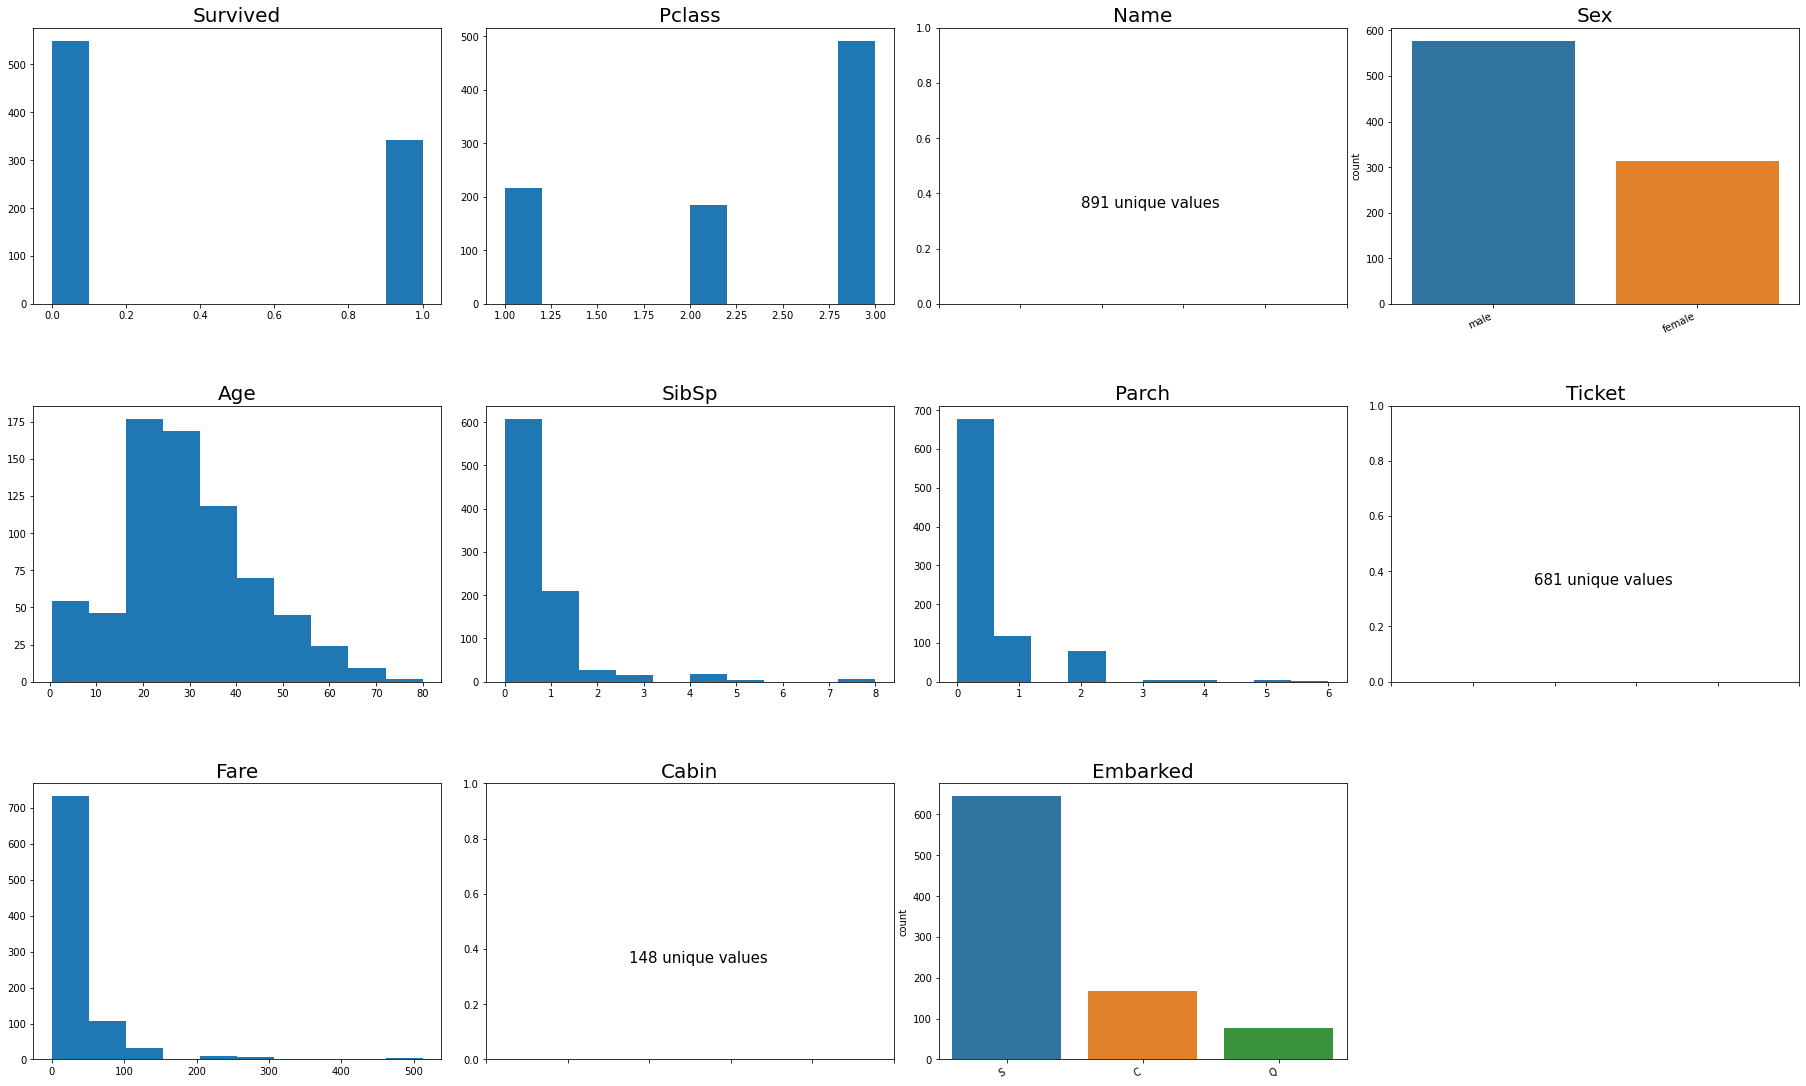

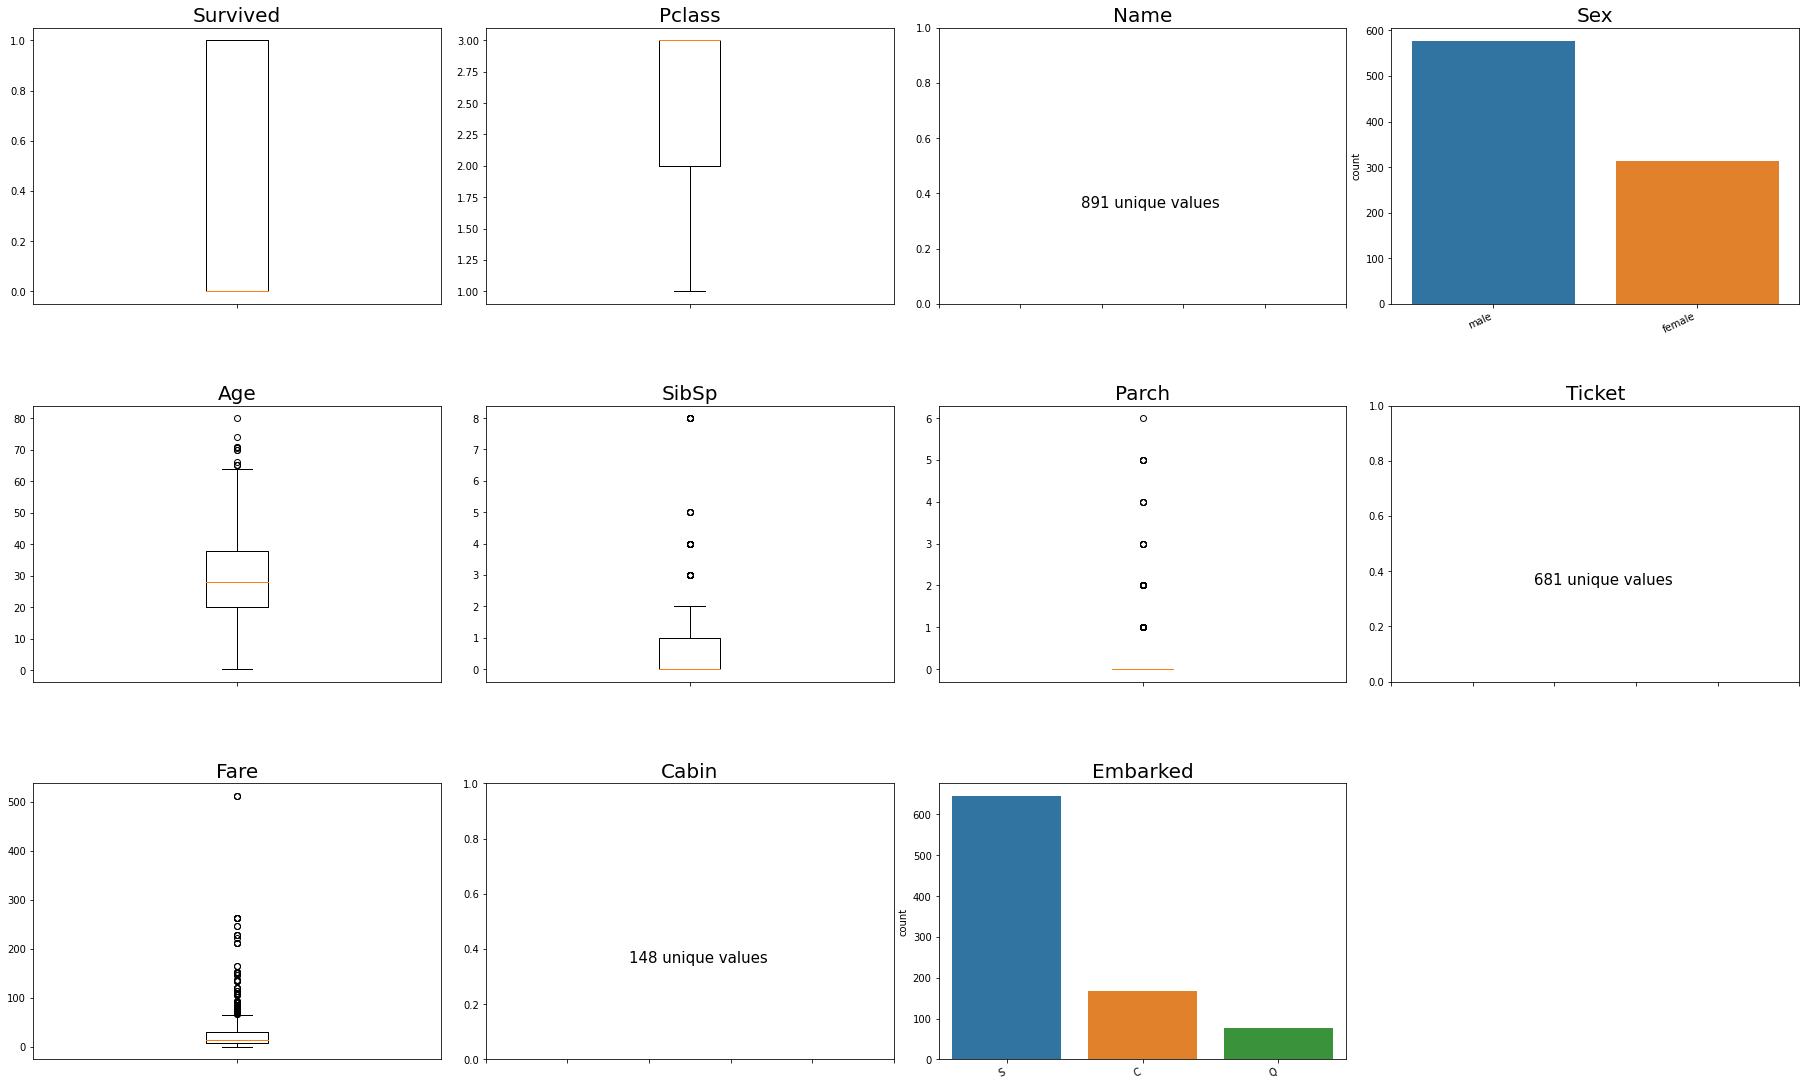

In [9]:
box_hist_EDA_plots(data, plot_type='hist', no_rows=3)
box_hist_EDA_plots(data, no_rows=3)


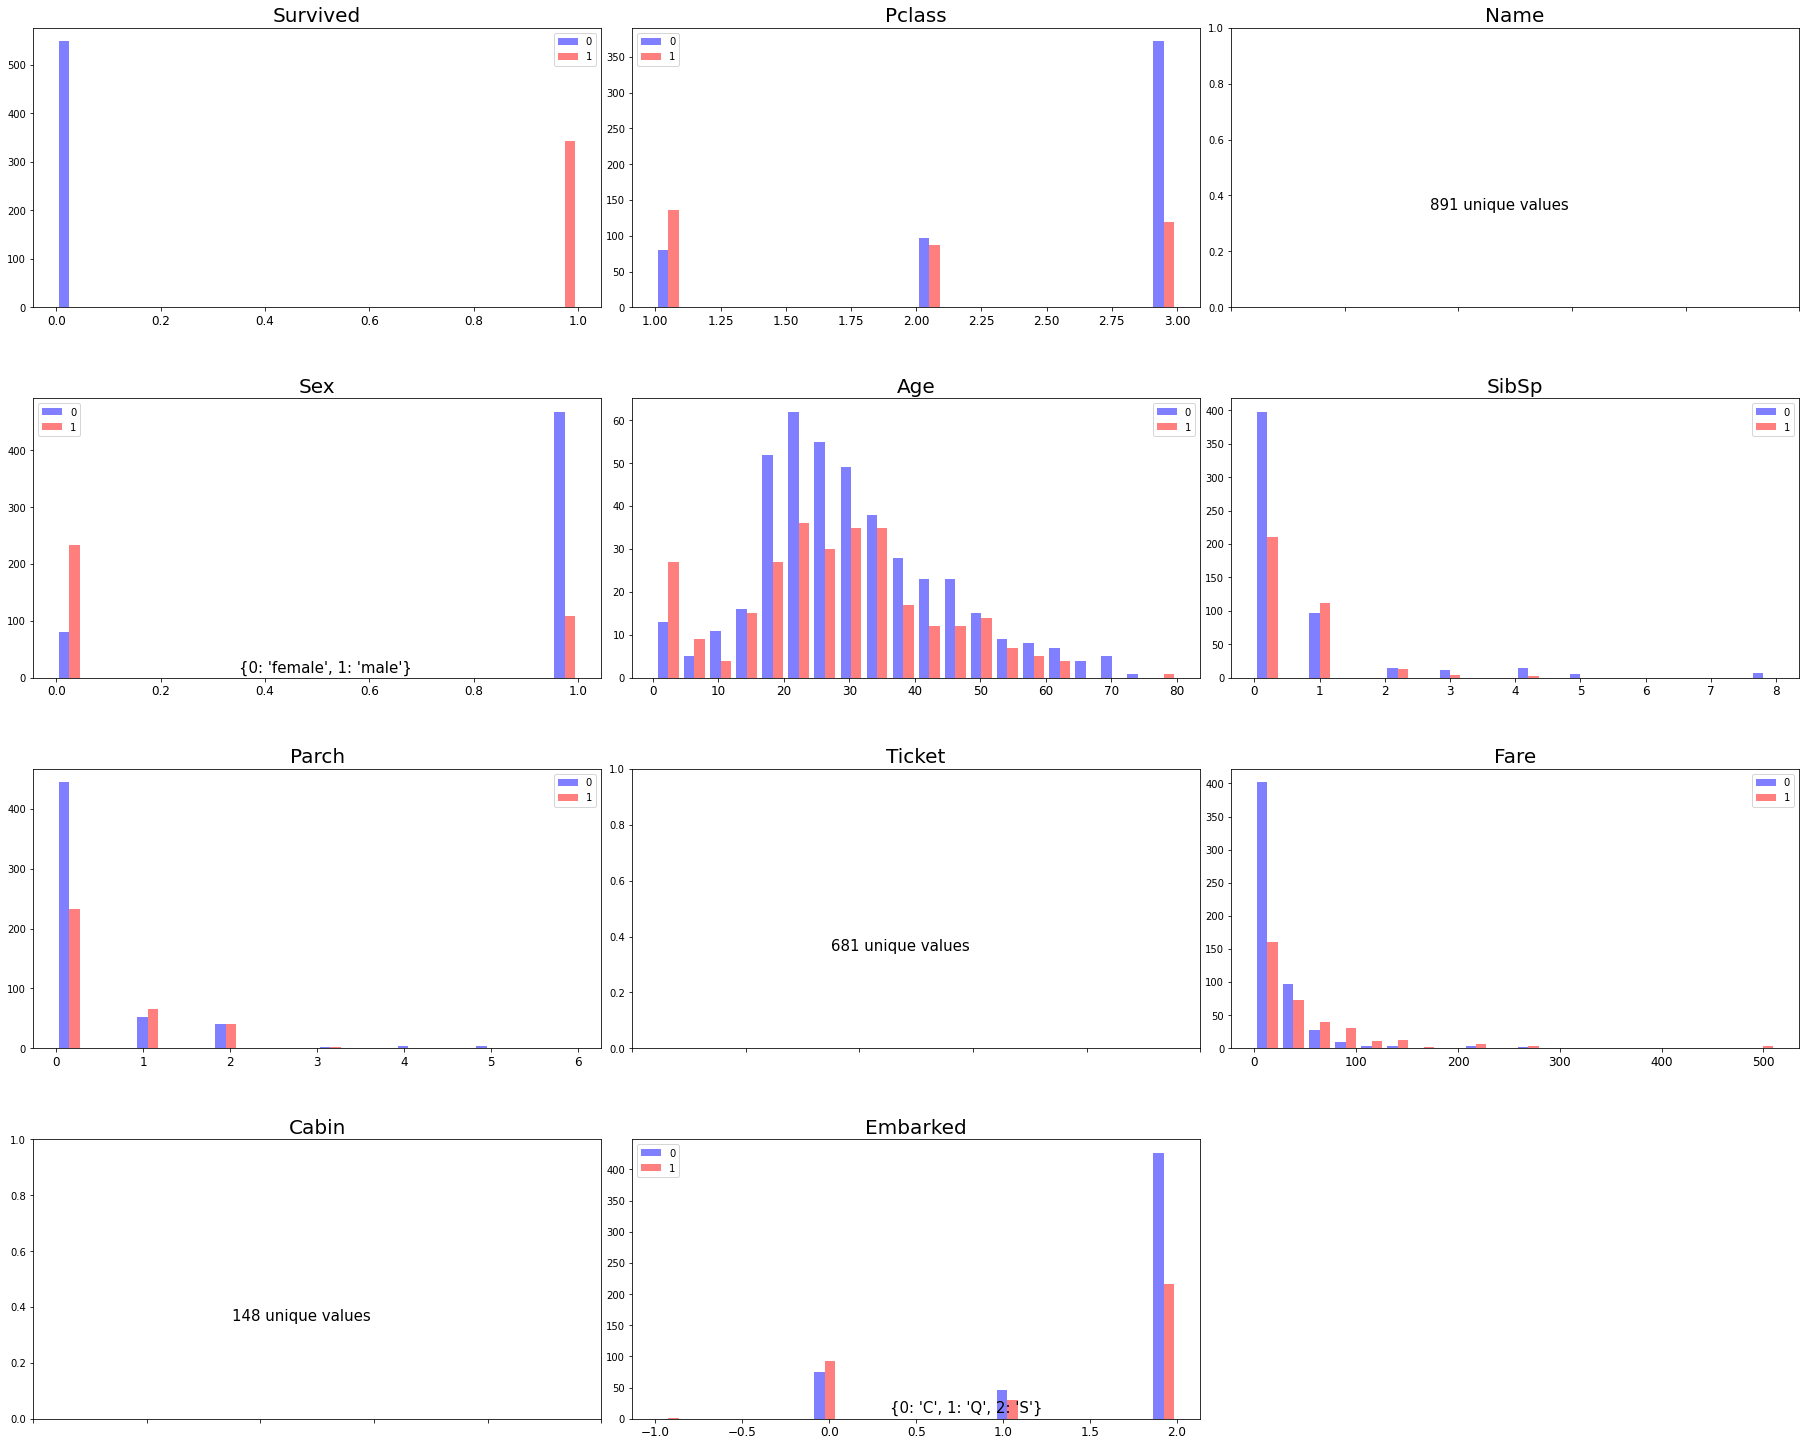

In [10]:
box_hist_EDA_plots(data, plot_type='hist', target_att="Survived", no_rows=4)

From the above collection of plots, the "Pclass" and "Sex" subplots are the ones that give the most valuable information about the outcome.

 - Passengers in class 3 had significantly lower chances to survive.
 - Female passengers and passengers 1 had higher chances to survive.
 - Age does not play important role.
 
 
 To further investigate the importance of the attributes, the female data are isolated and presented below.
 - Around 75% of women onboard survived
 - The strong majority of them in classes 1 & 2 managed to survive
 

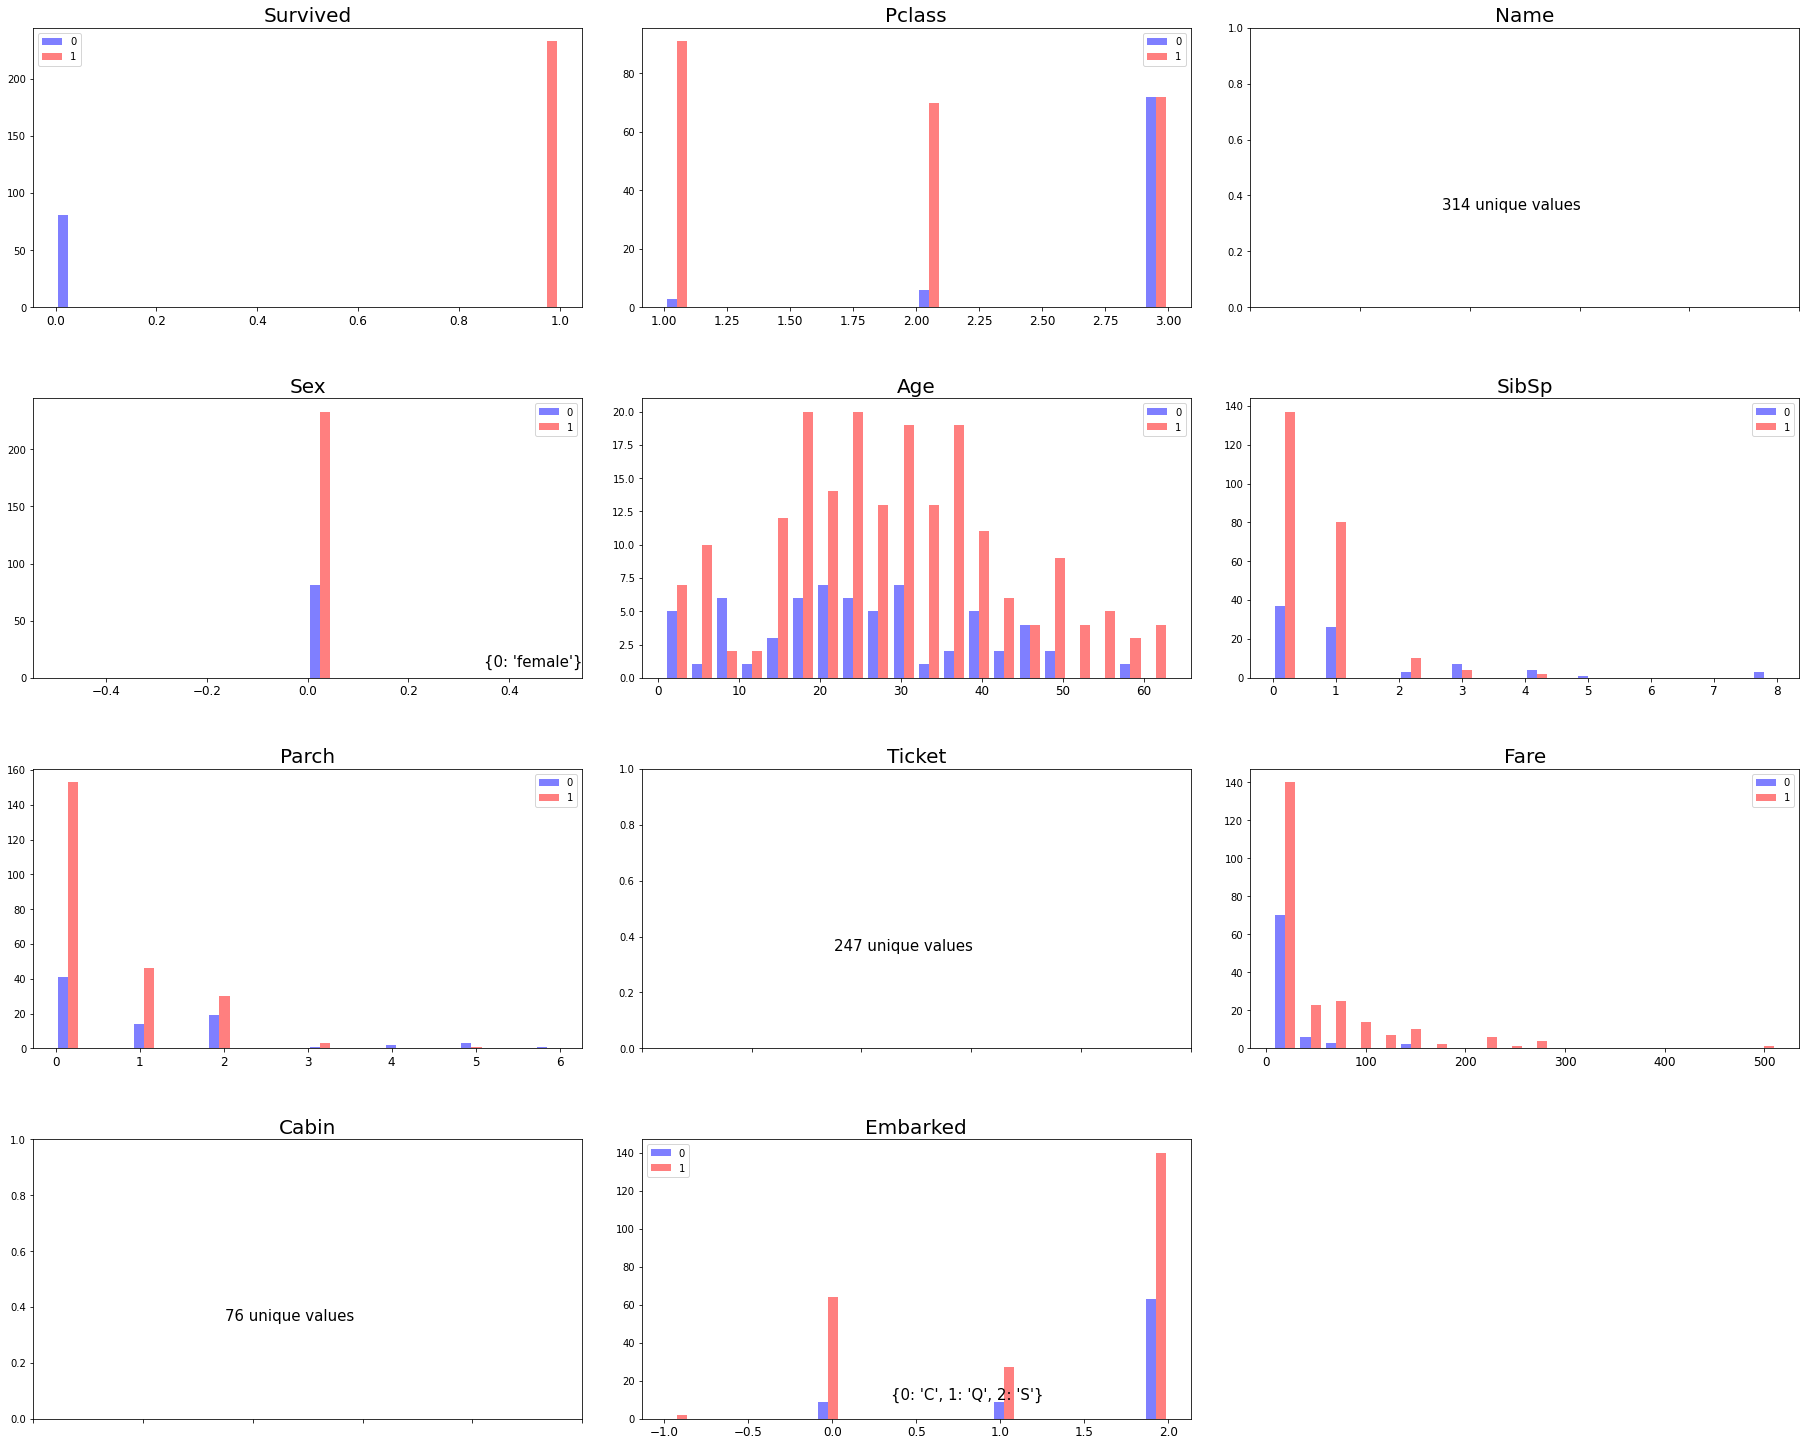

In [11]:
data_female = data[data.Sex == "female"]
box_hist_EDA_plots(data_female, plot_type='hist', target_att="Survived", no_rows=4)


In [12]:
def bar_plot_count_percentage(data, att, attTarget, title, plotType='Both'):
    """ Creates a bar plot that compares 2 attributes, eg a random att vs
    the target attribute

    Parameters
    ----------
    df: (dataframe)
    att: (str)
    attTarget: (str)
    path: (str) path where the plot will be saved

    Output: buf (to be printed in the pdf)
    """

    df = data.copy(deep=True)
    gb = DA.groupby_count_percentage(df, [att, attTarget])

    x = gb[att].str.split(",", n=1, expand=True)
    y = x[0].map(lambda x: x.lstrip('(').rstrip('aAbBcC'))
    y = y.sort_values(ascending=True)
    gb.iloc[y.index.tolist()]

    sns.set_style("whitegrid")

    subSize = 2 if plotType == 'Both' else 1

    fig, axes = plt.subplots(subSize, 1, figsize=(14, 8))

    if plotType == 'Both':
        sp = sns.barplot(x=att, y="count", hue=attTarget, data=gb, ax=axes[0])
    if plotType == 'Count':
        sp = sns.barplot(x=att, y="count", hue=attTarget, data=gb)

    if plotType != 'Per':
        _ = plt.setp(sp.get_xticklabels(), rotation=90)  # Rotate labels
        sp.set_yticklabels(sp.get_yticks(), size=15)
        sp.set_xticks([])
        sp.set_xlabel('')
        sp.set_title(title, fontsize=24)
        sp.set_ylabel('Count', fontsize=18)
        sp.legend(prop={'size': 16})

        for p in sp.patches:
            height = p.get_height()
            height = 0 if math.isnan(height) is True else height
            height = int(height)
            sp.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center", fontsize=15)

    if plotType == 'Both':
        sp = sns.barplot(x=att, y="Pop Per", hue=attTarget, data=gb, ax=axes[1])
    elif plotType == 'Per':
        sp = sns.barplot(x=att, y="Pop Per", hue=attTarget, data=gb)

    if plotType != 'Count':
        for ii, p in enumerate(sp.patches):
            height = p.get_height()
            height = round(height, 1)
            sp.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center", fontsize=15)

        sp.set_xlabel(att, fontsize=18)
        sp.set_ylabel('Percentage', fontsize=18)
        sp.set_yticklabels(sp.get_yticks(), size=15)
        # sp.set_xticklabels(sp.get_xticks(), size=15)
        sp.tick_params(labelsize=16)
        sp.legend(prop={'size': 16})

    fig.tight_layout()

    figure = sp.get_figure()
    plt.show()
    plt.close(figure)


In [13]:
def pie_plot(data, att1, value1, att2, att3, title):
    """ Creates a box plot that compares 3 attributes, eg a random att vs
    the target attribute

    Parameters
    ----------
    data: data
    att1: (str) main attribute
    value1: value to be ploted from att1
    att2: (str) secondary attribute
    att3: (str) secondary attribute
    title: (str) title

    Output: buf (to be printed in the pdf)
    """
    plt.figure()
    att_1_2_count_per = DA.groupby_count_percentage(data, [att1, att2])
    att_1_2_3_count_per = DA.groupby_count_percentage(data, [att1, att2, att3])

    group_names = att_1_2_count_per[att_1_2_count_per[att1] == str(value1)][att2].tolist()
    group_size = att_1_2_count_per[att_1_2_count_per[att1] == str(value1)]['Pop Per'].tolist()

    subgroup_names, subgroup_size = [], []
    for att2_i in att_1_2_count_per[att_1_2_count_per[att1] == str(value1)][att2].tolist():
        subgroup_names.append(att_1_2_3_count_per[(att_1_2_3_count_per[att1] == str(value1)) & (att_1_2_3_count_per[att2] == att2_i)][att3].tolist())
        subgroup_size.append(att_1_2_3_count_per[(att_1_2_3_count_per[att1] == str(value1)) & (att_1_2_3_count_per[att2] == att2_i)]['Pop Per'].tolist())


    subgroup_names = [item[0:10] for sublist in subgroup_names for item in sublist]
    subgroup_size = [item for sublist in subgroup_size for item in sublist]
    subgroup_size = [0 if math.isnan(x) else x for x in subgroup_size]

    clrs, d07set = [], []

    for i in range(0, len(data[att2].unique().tolist())):
        d = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
        start_clr = 0.65
        d07set.append(d[i](0.7))
        for r in data[att3].unique().tolist():
            clrs.append(d[i](start_clr))
            start_clr = start_clr - 0.15

    # First Ring (outside)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('equal')
    mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, textprops={'fontsize': 14}, colors=d07set)
    plt.setp(mypie, width=0.3, edgecolor='white')

    # Second Ring (Inside)
    mypie, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, textprops={'fontsize': 14}, labeldistance=0.7, colors=clrs)
    plt.setp(mypie, width=0.4, edgecolor='white')
    plt.margins(0, 0)

    ax.text(-0.28, 0, title, fontsize=14)
    plt.tight_layout()
    plt.show()


The same conclusions stem from the donut charts below.

<Figure size 432x288 with 0 Axes>

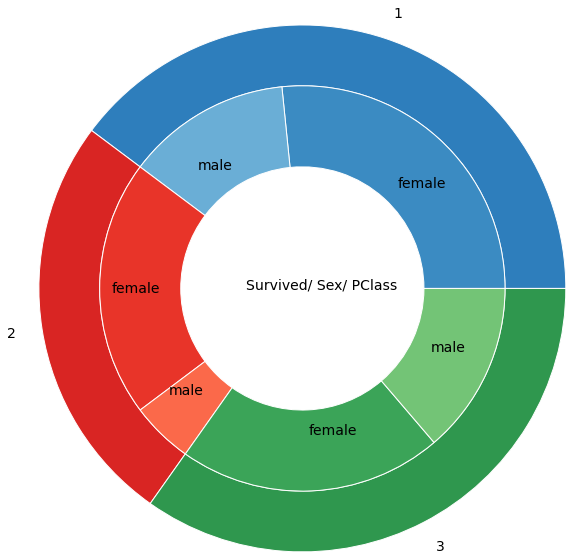

<Figure size 432x288 with 0 Axes>

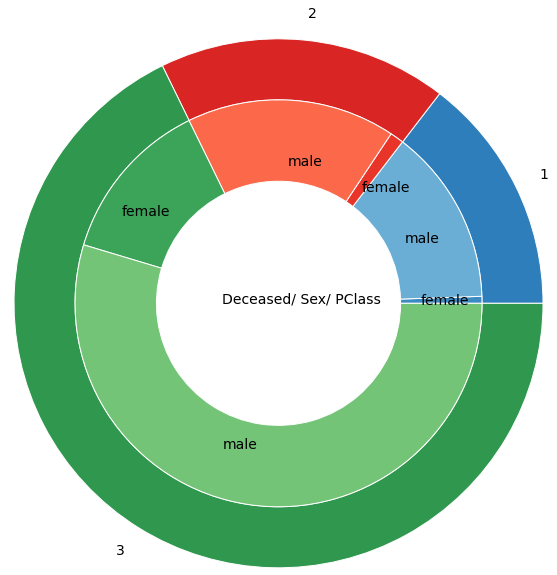

In [14]:
pie_plot(data, 'Survived', 1, 'Pclass', 'Sex', "Survived/ Sex/ PClass")
pie_plot(data, 'Survived', 0, 'Pclass', 'Sex', "Deceased/ Sex/ PClass")

In [15]:
def heatmap_corr_plot(data, listColmRemove=[]):

    data_columns = data.columns.tolist()

    if listColmRemove != []:
        for colm in listColmRemove:
            data_columns.remove(colm)

    data = data[data_columns]

    mask = np.triu(data.corr())
    plt.figure(figsize=(15, 6))
    sns.heatmap(round(data.corr(), 2), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    # plt.ylim(18, 0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()


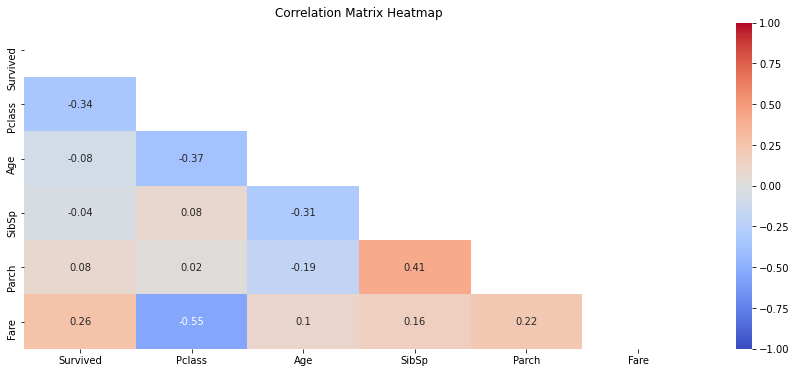

In [16]:
heatmap_corr_plot(data)

## Feature Analysis

The next step of the analysis is the feature analysis

 - The SibSp and the Parch columns are added together to create the family size attribute
 - The sex and age attributes are combined to further categorise the sex attribute by adding the Male and Female Child values
 - Columns that proved not important or with high number of Nan values are removed

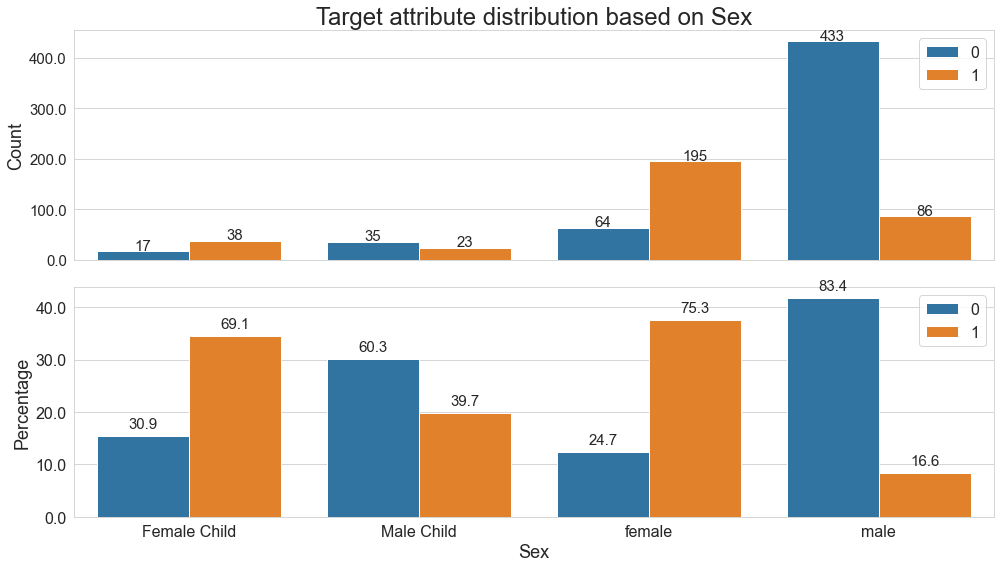

In [17]:
# ------------------- Feature Analysis -------------------------------------------

data["FamilySize"] = data["SibSp"] + data["Parch"]
data["Title"] = data["Name"].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(1))
# data["TitleCat"], title_codes = DA.categorise_codes(data, "Title")

data.loc[(data['Sex'] == 'male') & (data['Age'] < 18), 'Sex'] = 'Male Child'
data.loc[(data['Sex'] == 'female') & (data['Age'] < 18), 'Sex'] = 'Female Child'
bar_plot_count_percentage(data, 'Sex', 'Survived', 'Target attribute distribution based on Sex', 'Both')

data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
data.drop(['Title', 'Name'], axis=1, inplace=True)

X = data.drop(['Survived'], 1)
y = data['Survived']


The above plot combines the sex and age attributes. Male children had higher chances to survive compared to male adults. On the other hand, this was not the case for female children.

In [18]:
descriptive_analysis(data, 'Survived')

         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

       FamilySize  
count  891.000000  
mean     0.904602  
std      1.613459  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max     10.000000  

number of attributes:  9 / number of instances:  891 

        index  NaN NaN % memory Un

## Pipeline - Data Trasformation

The following function receives the analysed dataset and returns the final cleansed dataset.
Inside the function, missing values are imputed and Ordinal Encoder or one hor Encoder is applied o nthe categorical attributes.
The pipeline object is returned and can be used for future data.

In [19]:
from pandas.api.types import is_numeric_dtype
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # , KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


def data_transformation(X, numerical_features=[], categorical_features=[], cat_type=0):

    def get_column_names_from_ColumnTransformer(column_transformer, numerical_features):
        col_name = []
        for transformer_in_columns in column_transformer.transformers_[:]:  # the last transformer is ColumnTransformer's 'remainder'
            raw_col_name = transformer_in_columns[2]
            if transformer_in_columns[0] == 'numerical':
                raw_col_name = numerical_features
            if isinstance(transformer_in_columns[1], Pipeline):
                transformer = transformer_in_columns[1].steps[-1][1]
            else:
                transformer = transformer_in_columns[1]
            try:
                names = transformer.get_feature_names()
            except AttributeError:  # if no 'get_feature_names' function, use raw column name
                names = raw_col_name
            if isinstance(names, np.ndarray):  # eg.
                col_name += names.tolist()
            elif isinstance(names, list):
                col_name += names
            elif isinstance(names, str):
                col_name.append(names)
        return col_name

    # Numerical attributes are detected if not defined
    if numerical_features == []:
        numerical_features = [cols for cols in X.columns if is_numeric_dtype(X[cols])]
    num_features_index = [X.columns.get_loc(c) for c in numerical_features if c in X]
    if categorical_features == []:
        categorical_features = [cols for cols in X.columns if cols not in numerical_features]
    cat_features_index = [X.columns.get_loc(c) for c in categorical_features if c in X]

    # =====================================================================
    # Applying SimpleImputer and will search for different scalers using GridSearchCV
    numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                            ('scaler', MinMaxScaler())])

    if cat_type == 0:
        # Applying SimpleImputer and then OneHotEncoder
        categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    else:
        categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OrdinalEncoder())])

    data_transformer = ColumnTransformer(transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])

    # =====================================================================
    trasnformer = ('data_transformer', data_transformer)
    pipe_line = Pipeline([trasnformer])

    # =====================================================================

    X_fit = pipe_line.fit_transform(X)
    pipe_line.fit(X)
    col_names_pipeline = get_column_names_from_ColumnTransformer(data_transformer, numerical_features)

    df_fit = round(pd.DataFrame(X_fit, columns=col_names_pipeline), 3)
    return df_fit, pipe_line

In [20]:
X_tr, pipeline_tr = data_transformation(X)                          

Finally, the transormed data are fed into the ML pipeline/class which can be found into the EDA_ML_Package.

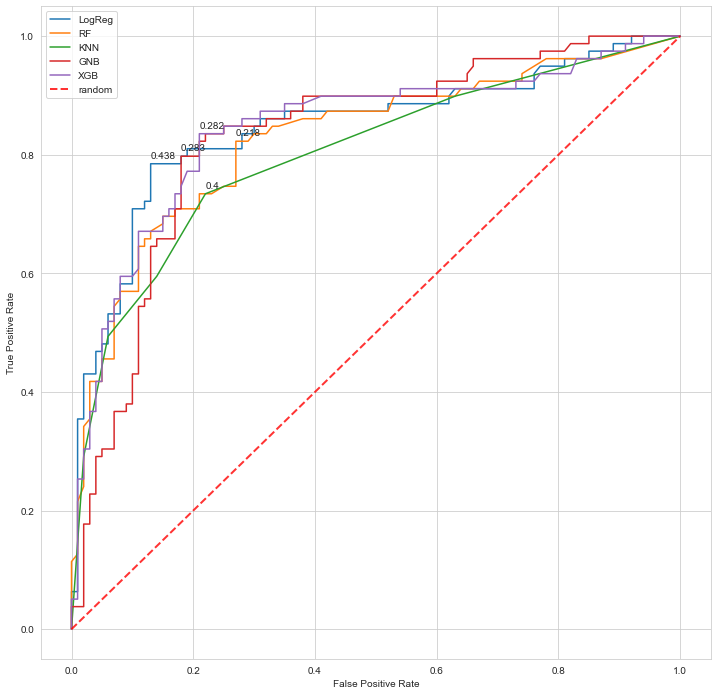

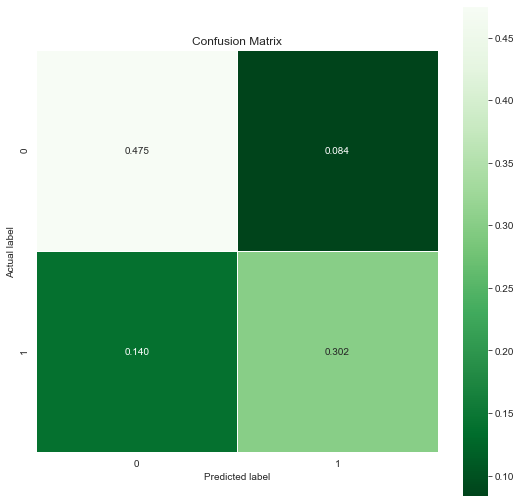

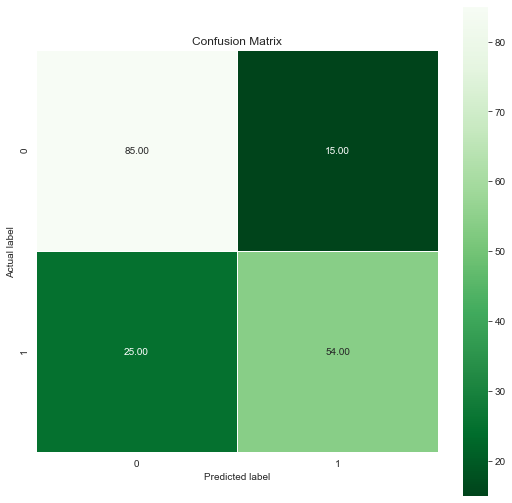

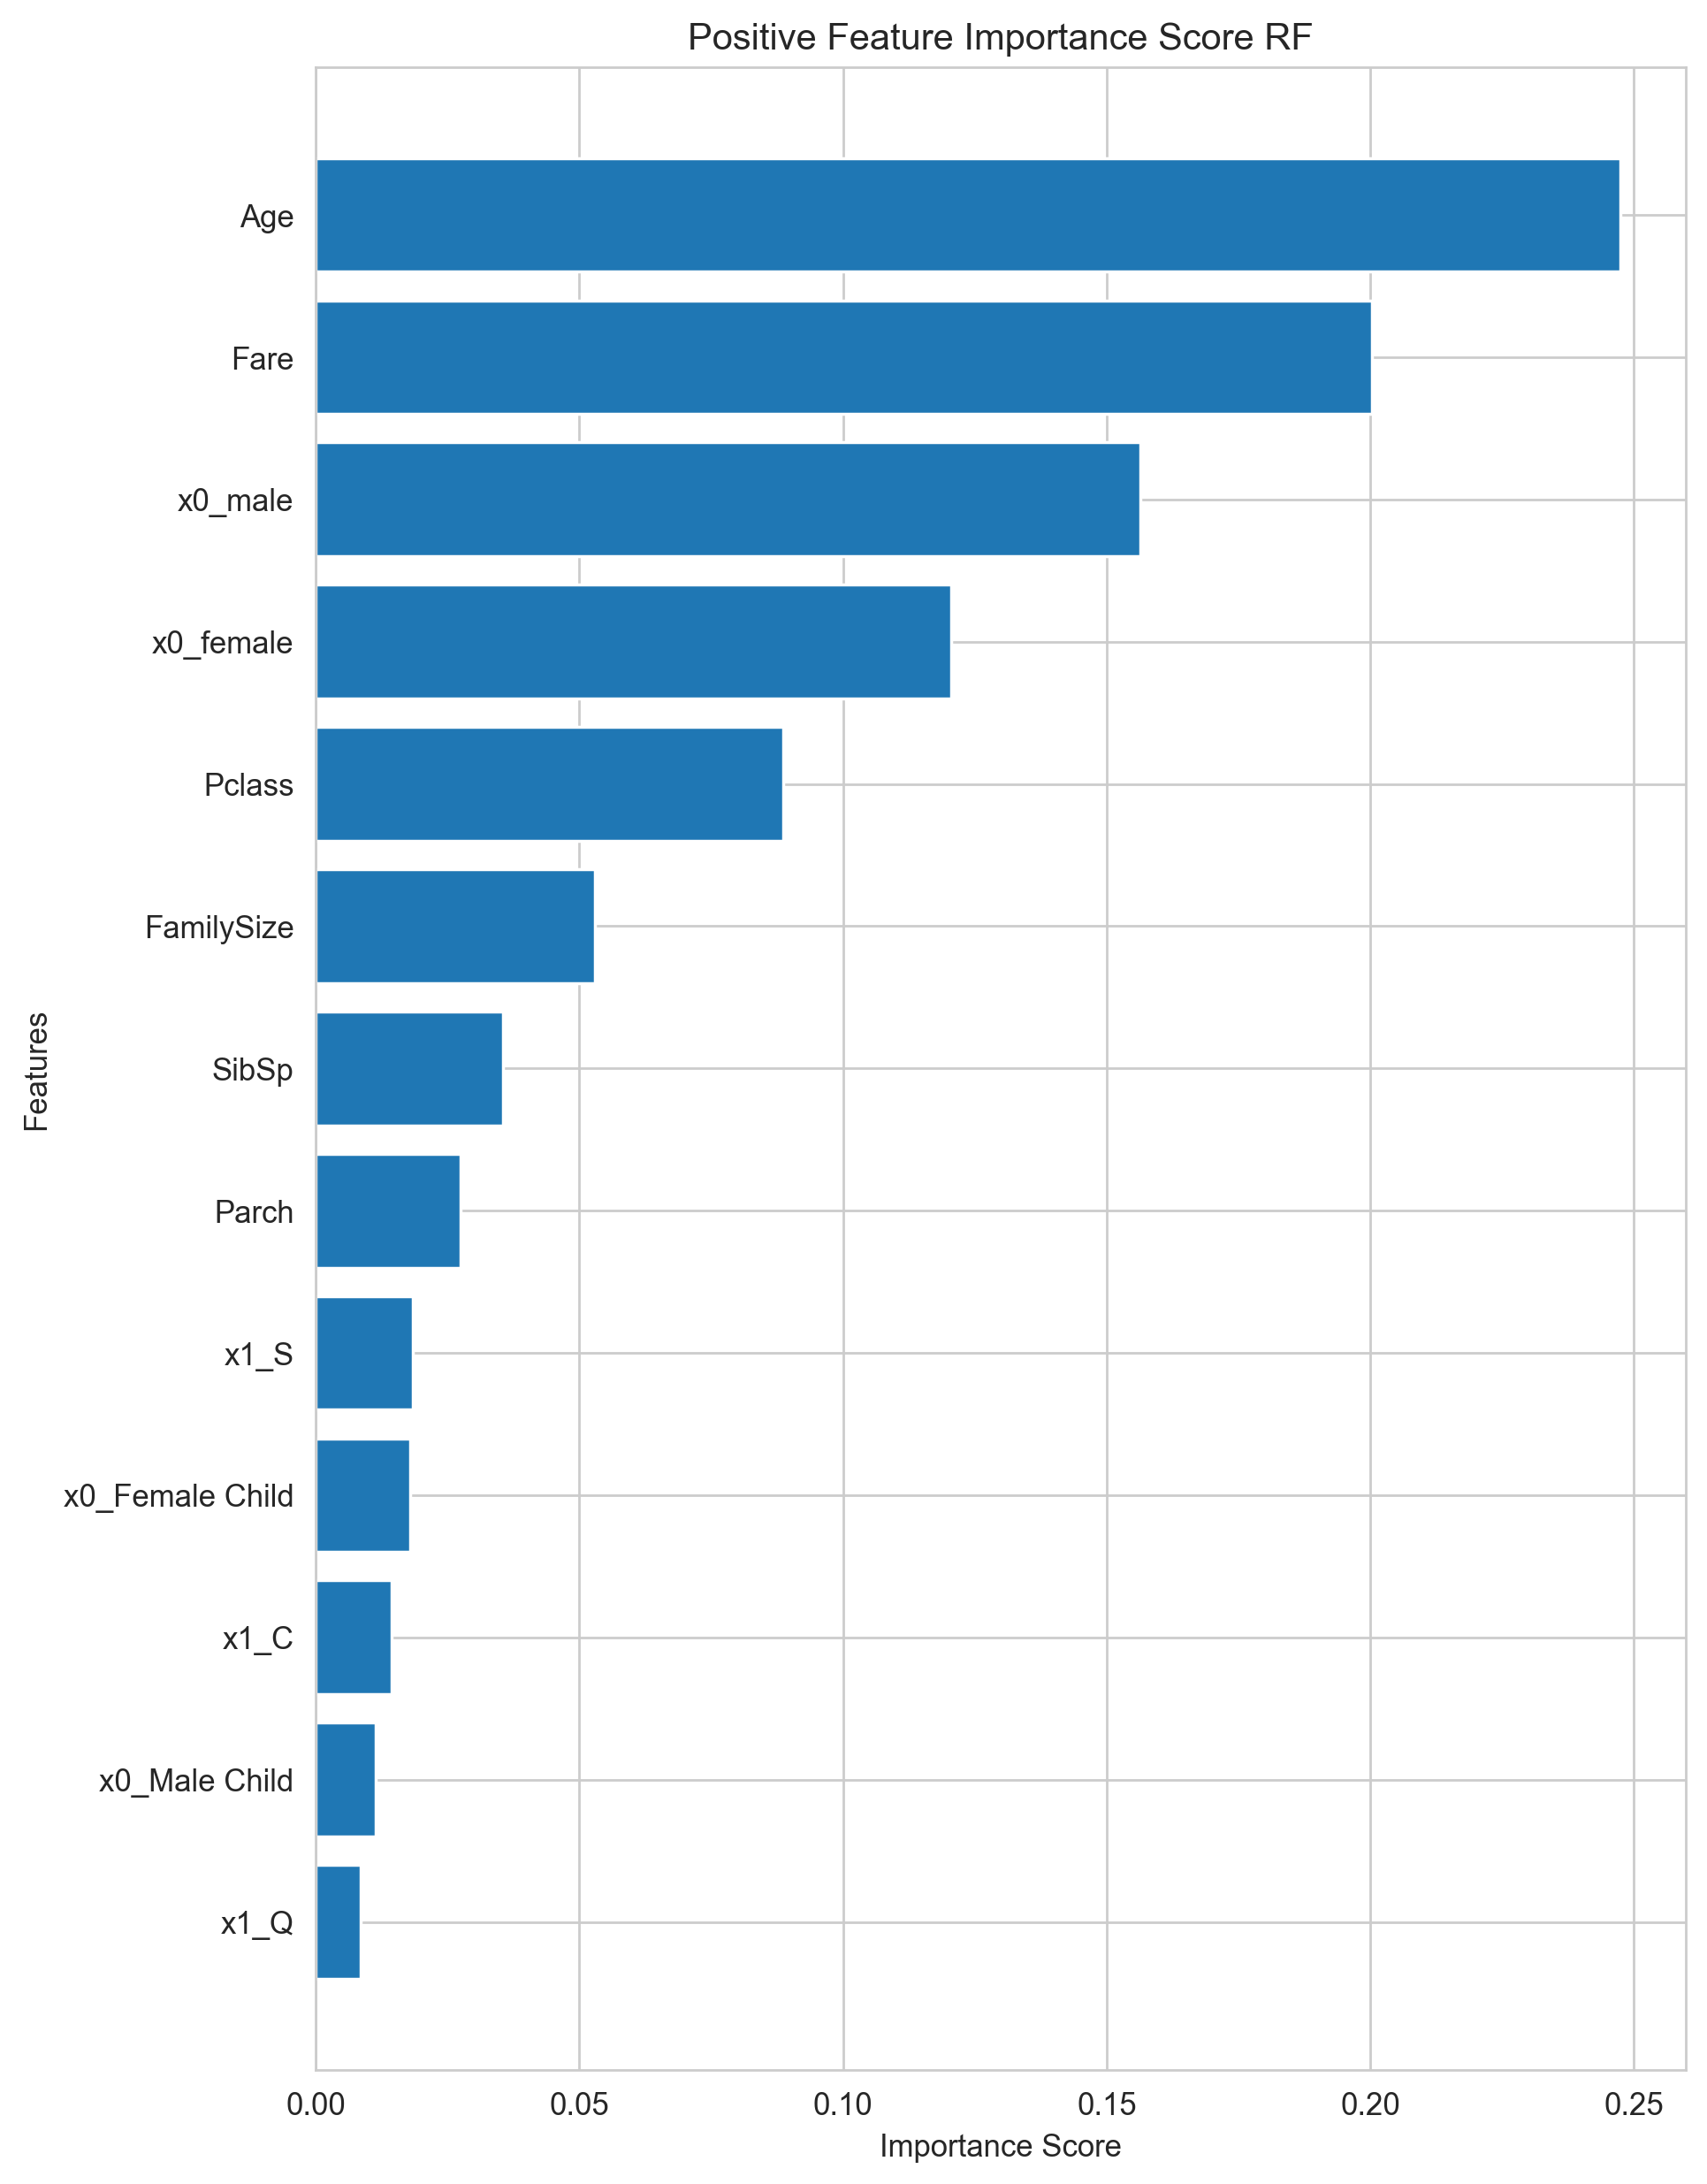


 ================ ML Analysis Completed ================
    model    acc  precision  recall     f1 dtype  fit_tm  score_tm
0  LogReg  0.810      0.826   0.722  0.770  test     NaN       NaN
3     GNB  0.777      0.767   0.709  0.737  test     NaN       NaN
1      RF  0.777      0.783   0.684  0.730  test     NaN       NaN
4     XGB  0.777      0.855   0.595  0.701  test     NaN       NaN
2     KNN  0.743      0.770   0.595  0.671  test     NaN       NaN
9     XGB  0.824      0.802   0.702  0.747    cv   0.048     0.004
6      RF  0.819      0.784   0.704  0.741    cv   0.133     0.011
5  LogReg  0.815      0.773   0.710  0.738    cv   0.009     0.004
7     KNN  0.816      0.789   0.696  0.736    cv   0.003     0.009
8     GNB  0.788      0.711   0.724  0.715    cv   0.003     0.003


<Figure size 432x288 with 0 Axes>

In [21]:
results = ML.ML_Basic_Models(X_tr, y)


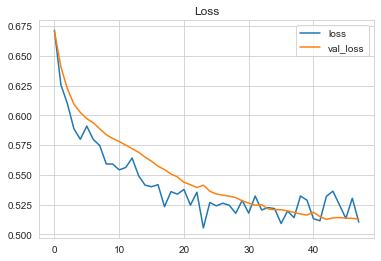

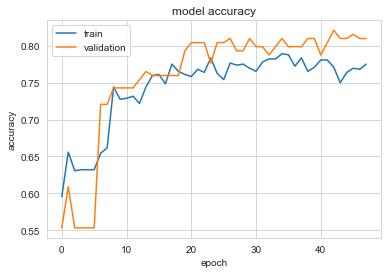


 ================ NN Analysis Completed ================
    acc  precision  recall     f1  roc_auc  layers   opt   dr
0  0.81      0.848     0.7  0.767    0.869  [4, 2]  Adam  0.3


In [22]:
results_NN = ΝΝ.create_and_fit_model(X_tr, y, 10, 350, lyrs=[4, 2], verbose=0, dr=0.3)
# results_NN = ΝΝ.create_and_fit_model(X_tr, y, 10, 350, lyrs=[5, 2], verbose=0, dr=0)
# results_opt_RF, best_params, random_grid = ML.opt_ramdom_forest(X_tr, y, n_iter=20, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] epochs=15, batch_size=5 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... epochs=15, batch_size=5, total=   1.9s
[CV] epochs=15, batch_size=5 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .......................... epochs=15, batch_size=5, total=   1.7s
[CV] epochs=15, batch_size=5 .........................................
[CV] .......................... epochs=15, batch_size=5, total=   1.8s
[CV] epochs=75, batch_size=5 .........................................
[CV] .......................... epochs=75, batch_size=5, total=   7.8s
[CV] epochs=75, batch_size=5 .........................................
[CV] .......................... epochs=75, batch_size=5, total=   6.5s
[CV] epochs=75, batch_size=5 .........................................
[CV] .......................... epochs=75, batch_size=5, total=   2.5s
[CV] epochs=15, batch_size=15 ........................................
[CV] ......................... epochs=15, batch_size=15, total=   1.0s
[CV] epochs=15, batch_size=15 ........................................
[CV] ......................... epochs=15, batch_size=15, total=   1.0s
[CV] epochs=15, batch_size=15 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   34.9s finished




Best: 0.778109 using {'epochs': 75, 'batch_size': 5}
0.765492 (0.025414) with: {'epochs': 15, 'batch_size': 5} 


0.778109 (0.009477) with: {'epochs': 75, 'batch_size': 5} 


0.736027 (0.036538) with: {'epochs': 15, 'batch_size': 15} 


0.776708 (0.011458) with: {'epochs': 75, 'batch_size': 15} 




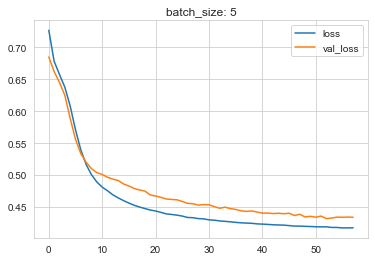

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... opt=SGD, total=   6.0s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] .......................................... opt=SGD, total=   6.5s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   3.6s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   7.6s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   7.1s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   3.5s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   6.7s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   6.5s
[CV] opt=Adagrad .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.8min finished




Best: 0.778109 using {'opt': 'Adam'}
0.771100 (0.022572) with: {'opt': 'SGD'} 


0.766869 (0.018776) with: {'opt': 'RMSprop'} 


0.639105 (0.031239) with: {'opt': 'Adagrad'} 


0.377832 (0.016772) with: {'opt': 'Adadelta'} 


0.778109 (0.009477) with: {'opt': 'Adam'} 


0.778109 (0.009477) with: {'opt': 'Nadam'} 




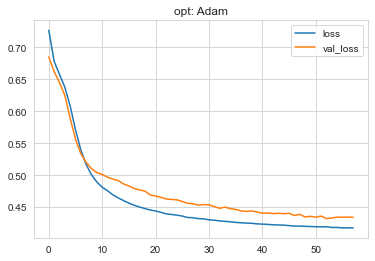

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] lyrs=[6] ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................................... lyrs=[6], total=   4.0s
[CV] lyrs=[6] ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] ......................................... lyrs=[6], total=   5.1s
[CV] lyrs=[6] ........................................................
[CV] ......................................... lyrs=[6], total=   1.8s
[CV] lyrs=[6, 4] .....................................................
[CV] ...................................... lyrs=[6, 4], total=   7.4s
[CV] lyrs=[6, 4] .....................................................
[CV] ...................................... lyrs=[6, 4], total=   5.6s
[CV] lyrs=[6, 4] .....................................................
[CV] ...................................... lyrs=[6, 4], total=   6.8s
[CV] lyrs=[6, 4, 2] ..................................................
[CV] ................................... lyrs=[6, 4, 2], total=   7.7s
[CV] lyrs=[6, 4, 2] ..................................................
[CV] ................................... lyrs=[6, 4, 2], total=   5.7s
[CV] lyrs=[6, 4, 2] ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   50.3s finished




Best: 0.794975 using {'lyrs': [6]}
0.794975 (0.016927) with: {'lyrs': [6]} 


0.792173 (0.025961) with: {'lyrs': [6, 4]} 


0.682427 (0.079445) with: {'lyrs': [6, 4, 2]} 




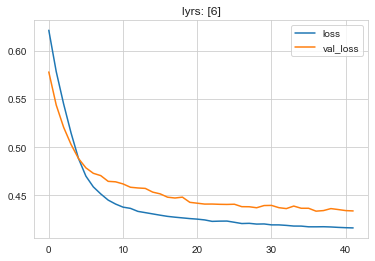

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... dr=0.0, total=   4.5s
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] ........................................... dr=0.0, total=   5.2s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   2.2s
[CV] dr=0.1 ..........................................................
[CV] ........................................... dr=0.1, total=   3.9s
[CV] dr=0.1 ..........................................................
[CV] ........................................... dr=0.1, total=   5.3s
[CV] dr=0.1 ..........................................................
[CV] ........................................... dr=0.1, total=   2.0s
[CV] dr=0.2 ..........................................................
[CV] ........................................... dr=0.2, total=   3.9s
[CV] dr=0.2 ..........................................................
[CV] ........................................... dr=0.2, total=   5.3s
[CV] dr=0.2 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   45.7s finished




Best: 0.794975 using {'dr': 0.0}
0.794975 (0.016927) with: {'dr': 0.0} 


0.794975 (0.016927) with: {'dr': 0.1} 


0.794975 (0.016927) with: {'dr': 0.2} 


0.794975 (0.016927) with: {'dr': 0.3} 




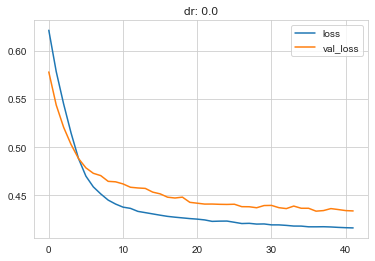

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] layers_act=relu .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. layers_act=relu, total=   4.0s
[CV] layers_act=relu .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] .................................. layers_act=relu, total=   5.2s
[CV] layers_act=relu .................................................
[CV] .................................. layers_act=relu, total=   1.9s
[CV] layers_act=tanh .................................................
[CV] .................................. layers_act=tanh, total=   5.0s
[CV] layers_act=tanh .................................................
[CV] .................................. layers_act=tanh, total=   4.6s
[CV] layers_act=tanh .................................................
[CV] .................................. layers_act=tanh, total=   2.0s
[CV] layers_act=sigmoid ..............................................
[CV] ............................... layers_act=sigmoid, total=   7.7s
[CV] layers_act=sigmoid ..............................................
[CV] ............................... layers_act=sigmoid, total=   7.4s
[CV] layers_act=sigmoid ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   41.6s finished




Best: 0.797770 using {'layers_act': 'tanh'}
0.794975 (0.016927) with: {'layers_act': 'relu'} 


0.797770 (0.012118) with: {'layers_act': 'tanh'} 


0.793568 (0.014569) with: {'layers_act': 'sigmoid'} 




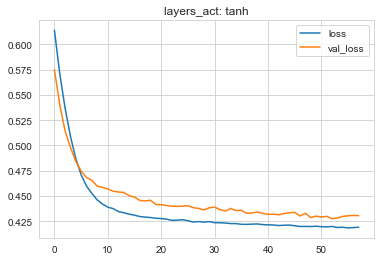

Epoch 1/75
143/143 - 1s - loss: 0.6063 - accuracy: 0.6713 - val_loss: 0.6207 - val_accuracy: 0.6313
Epoch 2/75
143/143 - 0s - loss: 0.5561 - accuracy: 0.7331 - val_loss: 0.5758 - val_accuracy: 0.7151
Epoch 3/75
143/143 - 0s - loss: 0.5195 - accuracy: 0.7837 - val_loss: 0.5400 - val_accuracy: 0.7709
Epoch 4/75
143/143 - 0s - loss: 0.4920 - accuracy: 0.7992 - val_loss: 0.5146 - val_accuracy: 0.7821
Epoch 5/75
143/143 - 0s - loss: 0.4723 - accuracy: 0.7963 - val_loss: 0.4993 - val_accuracy: 0.7821
Epoch 6/75
143/143 - 0s - loss: 0.4593 - accuracy: 0.7963 - val_loss: 0.4884 - val_accuracy: 0.7821
Epoch 7/75
143/143 - 0s - loss: 0.4511 - accuracy: 0.8006 - val_loss: 0.4785 - val_accuracy: 0.7877
Epoch 8/75
143/143 - 0s - loss: 0.4454 - accuracy: 0.8104 - val_loss: 0.4696 - val_accuracy: 0.7877
Epoch 9/75
143/143 - 0s - loss: 0.4412 - accuracy: 0.8174 - val_loss: 0.4645 - val_accuracy: 0.7933
Epoch 10/75
143/143 - 0s - loss: 0.4380 - accuracy: 0.8202 - val_loss: 0.4615 - val_accuracy: 0.7933

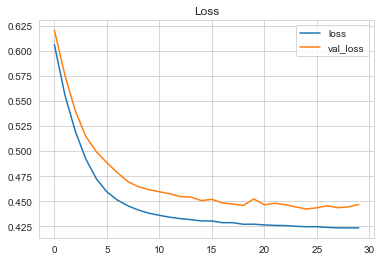

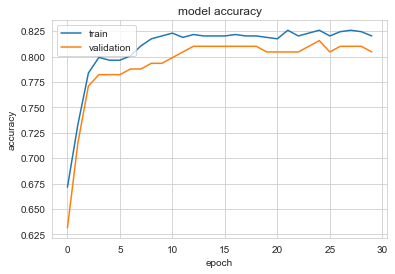

{'acc': [0.8044692737430168], 'precision': [0.8688524590163934], 'recall': [0.6625], 'f1': [0.75177304964539], 'roc_auc': [0.8707070707070708], 'layers': '[6]', 'opt': '0.0', 'dr': '0.0'}


In [23]:
results_opt_NN, _ = ΝΝ.chain_optimazation(X_tr, y, hidden_layers=[[6], [4, 2], [6, 4, 2]])
print(results_opt_NN)

In [24]:
print(results_opt_NN)

{'acc': [0.8044692737430168], 'precision': [0.8688524590163934], 'recall': [0.6625], 'f1': [0.75177304964539], 'roc_auc': [0.8707070707070708], 'layers': '[6]', 'opt': '0.0', 'dr': '0.0'}
